### Case Study 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

##### Reading the dataset into Python

In [2]:
dataset=pd.read_csv('Sales_add.csv')
dataset

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


##### Checking the nulls

In [3]:
dataset.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [4]:
dataset.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


##### Descriptive analytics of the dataset

In [5]:
dataset.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

######   Inorder to determine whether the Sales of the company has increased  after and before the digtal marketing,
           We need to set a hypothesis testing for the analysis.
               1) Null Hypothesis (Ho)      = Sales after the digital marketing is less than or equal to before.
               2) Alternate Hypothesis(Ha) = Sales after the digital marketing is greater than before.

######  As the sample size is smaller (n<30), we use a T-Test and as the area of distributon is one sided, it is either greater than or less than a certain value but not both. A T - test is known as a directional hypothesis or a directional test. The significace level ,(Alpha) = 0.05

In [7]:
salesbeforeDigital =dataset["Sales_before_digital_add(in $)"]
salesafterDigital = dataset["Sales_After_digital_add(in $)"]

In [8]:
salesbeforeDigital.describe()

count        22.000000
mean     149239.954545
std       14844.042921
min      130263.000000
25%      138087.750000
50%      147444.000000
75%      157627.500000
max      178939.000000
Name: Sales_before_digital_add(in $), dtype: float64

In [9]:
salesafterDigital.describe()

count        22.000000
mean     231123.727273
std       25556.777061
min      187305.000000
25%      214960.750000
50%      229986.500000
75%      250909.000000
max      276279.000000
Name: Sales_After_digital_add(in $), dtype: float64

In [10]:
t_value,p_value= stats.ttest_ind(dataset['Sales_before_digital_add(in $)'],dataset['Sales_After_digital_add(in $)'])

In [11]:
t_value, p_value = stats.ttest_ind(dataset['Sales_After_digital_add(in $)'],dataset['Sales_before_digital_add(in $)'],equal_var=True, alternative='greater')
print('t-value obtained is :',t_value)
print('p-value obtained is :', p_value)

t-value obtained is : 12.995084451110877
p-value obtained is : 1.3071840034523225e-16


##### Insights: 
            From the observation, we have obtained a pvalue which is lesser than the significance value, alpha(0.05).
            So we have failed to reject the alternate hypothesis and reject the null hypothesis.
            Therefore we can say that the sales after the digital marketing is higher than the the sales before.

### 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”

####  To know that, we need to set a hypothesis testing.
            1) Null Hypothesis (Ho) -    The features Region and Manager are dependent, i.e. not independent.
            2)Alternate Hypothesis (Ha) - The features Region and Manager are not dependent, i.e. independent.

####  Since the variance between the variables to be analysed, we need to use Chi-square test.

        

In [12]:
##Converting the data into a contingency table with frequencies and using crosstab commands from pandas

In [13]:
from scipy.stats import chi2_contingency

In [14]:
data1=dataset['Region']
data2=dataset['Manager']

In [15]:
mycrosstable= pd.crosstab(data1,data2)
mycrosstable

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [16]:
chiValue,pValue,dof,exp = chi2_contingency(mycrosstable)
chiValue,pValue,dof,exp

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

##### Observation:
        The first value obtained is the chi-square value of 3.051. Then the pvalue of 0.5494,degrees of freedom (dof) shows the size of the table (No. of rows -1 times the number of columns - 1), and the last array is the expected values of counts if two variables had no influence on each other, and the lowest expected value should be atleast 1.

<AxesSubplot:xlabel='Manager', ylabel='Region'>

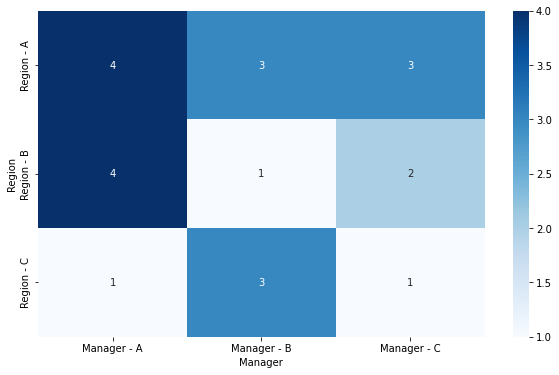

In [17]:
plt.figure(figsize =(10,6))
sns.heatmap(mycrosstable,annot = True,cmap ="Blues")

In [18]:
print("The p-value obtained is : ", pValue)

The p-value obtained is :  0.5493991051158094


#### Insights:
            From the observaton after hypothesis testing, the p- value obtained is 0.5494 which is greater than the significance level, alpha(0.05). So we fail to reject the Null Hypothesis (Ho) with a 95% of level of confidence and will reject the Alternate Hypothesis(Ha).
            Therefore we can say that, the two features Region and Manager are dependent to each other.
            